In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import pickle
from joblib import dump

# 1. Load the dataset
data = pd.read_csv('data.csv')

# 2. Handle missing values in all columns (non-deprecated)
data.ffill(inplace=True)

# 3. Drop any rows where the target is STILL NaN
data.dropna(subset=['Dangerous'], inplace=True)

# 4. (Optional) Quick check
print("Remaining NaNs in 'Dangerous':", data['Dangerous'].isna().sum())
# plottingh the results of this

Remaining NaNs in 'Dangerous': 0


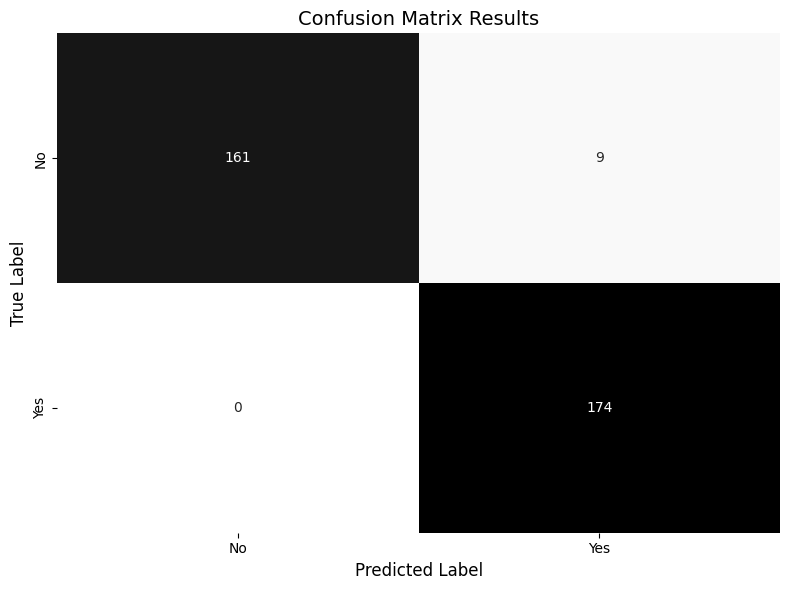

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming model, y_test, y_pred, and label_encoder already exist
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greys',  # Black & white color scheme
    cbar=False,
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix Results', fontsize=14)
plt.tight_layout()

# Save as image for the report
plt.savefig('confusion_matrix_bw.png', dpi=300, bbox_inches='tight')
plt.show()


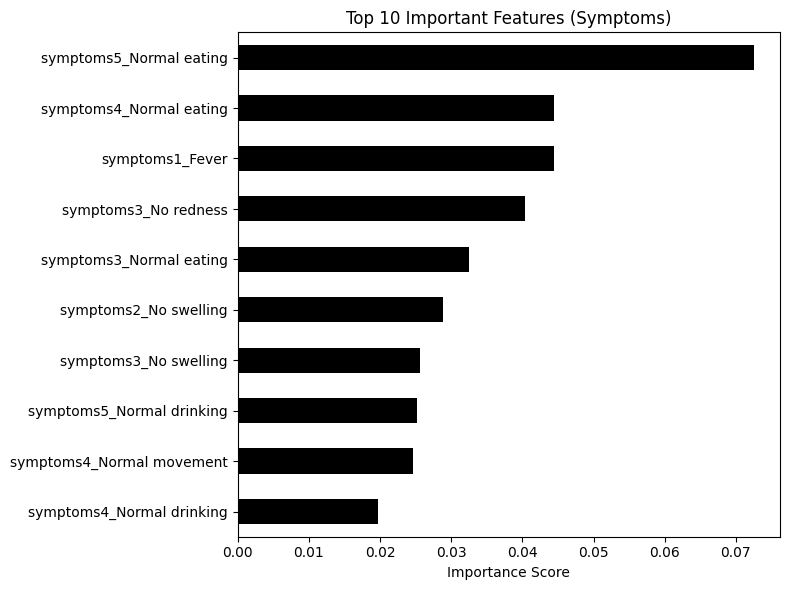

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming model is trained and X_encoded is your DataFrame of features
importances = model.feature_importances_
features = pd.Series(importances, index=X_encoded.columns)

# Sort and plot
features = features.sort_values(ascending=True).tail(10)  # Top 10 important features

plt.figure(figsize=(8, 6))
features.plot(kind='barh', color='black')
plt.title('Top 10 Important Features (Symptoms)')
plt.xlabel('Importance Score')
plt.tight_layout()

# Save for report
plt.savefig('feature_importance_bw.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:

# 5. Encode the target variable
label_encoder = LabelEncoder()
data['Dangerous'] = label_encoder.fit_transform(data['Dangerous'])

# Save the label encoder for later inverse transforms
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

# 6. One-hot encode the categorical features
cat_cols = ['AnimalName', 'symptoms1', 'symptoms2',
            'symptoms3', 'symptoms4', 'symptoms5']

encoder = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)
encoded_feats = encoder.fit_transform(data[cat_cols])

# Save the encoder
with open('onehot_encoder.pkl', 'wb') as enc_file:
    pickle.dump(encoder, enc_file)

# 7. Build a DataFrame of the new features, resetting indices to align
encoded_df = pd.DataFrame(
    encoded_feats,
    columns=encoder.get_feature_names_out(cat_cols)
).reset_index(drop=True)

# Also reset the index of the target column
dangerous_col = data['Dangerous'].reset_index(drop=True)

# Concatenate
data_enc = pd.concat([encoded_df, dangerous_col], axis=1)

# 8. Final check that the target has no NaNs
print("Final check – NaNs in y:", data_enc['Dangerous'].isna().sum())

# 9. Split into X and y
X = data_enc.drop('Dangerous', axis=1)
y = data_enc['Dangerous']

# 10. Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 11. Train the Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 12. Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 13. Save the trained model
dump(model, 'random_forest_model.joblib')
print("Model saved as 'random_forest_model.joblib'")